# EXPLORATORY DATA ANALYSIS


## Business Objective

-------------------------------------------------------------------------------------------------------------------------------

 To analyze data sets in order to summarize their main characteristics, often with visual methods.
 Additionally, EDA is used to uncover
 
    -maximize insight into a data set;
    -uncover underlying structure;
    -extract important variables;
    -detect outliers and anomalies;
    -test underlying assumptions;
    -develop parsimonious models; and
    -determine optimal factor settings.
 
-------------------------------------------------------------------------------------------------------------------------------


In [1]:
#importing libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import matplotlib.pyplot as plt
import time
from scipy.stats import kurtosis
from scipy.stats import skew   
import pylab as p
from IPython.display import Image

## 1.Importing Excel Sheet

In [2]:
#Changing the directory using os package, to the place where the excel sheet exists
os.chdir('C:/Users/Viswa/Desktop/R Project')

#Name of the excel sheet
excel_file='New Project.xlsx'
#Reading excel sheet into sales.
sales=pd.read_excel(open(excel_file,'rb'),sheet_name='Data_Without_Outliers')

## 2.Applying Basic Operations on Imported Data

In [3]:
#head(), retreives the information of the first 5 rows.
sales.head()

,po_number,agency,commodity,vendor_name,ordered_date,po_amount
0,PO491794,METROPOLITAN POLICE DEPARTMENT,"6800814:ARMOR AND ACCESSORIES, BODY",Fiber Brokers International,2014-02-12,0.01
1,PO463956-V2,DEPARTMENT OF EMPLOYMENT SERVICES,0375237:DESKTOP ACCESSORIES,PEMBROKE WEST ASSOCIATES INC,2013-09-27,1.00
2,PO449513-V2,DEPARTMENT OF MENTAL HEALTH,"2077984:TONER CARTRIDGES, LASER JET PRINTER, R...",SUPPLY ROOM COMPANIES,2013-10-02,1.00
3,PO486192-V2,OFFICE OF EMPLOYEE APPEALS,"TAPE, INSTANT RECORDING CASSETTE: LEADERLESS F...",FEDERAL EXPRESS,2014-02-07,1.00
4,PO490779,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"7852507:BOARDS, BULLETIN, COMBINATION MARK 'N ...",OFFICE DEPOT,2014-01-28,1.28


In [4]:
#meta-data
sales.info()
sales['po_amount'][0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12693 entries, 0 to 12692
Data columns (total 6 columns):
po_number       12693 non-null object
agency          12693 non-null object
commodity       12693 non-null object
vendor_name     12693 non-null object
ordered_date    12693 non-null datetime64[ns]
po_amount       12693 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 595.1+ KB


0.01

## 3.Making Changes to Imported Data

In [5]:
#dropping unnecessary columns
sales=sales.drop(['commodity','po_number'],axis=1)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12693 entries, 0 to 12692
Data columns (total 4 columns):
agency          12693 non-null object
vendor_name     12693 non-null object
ordered_date    12693 non-null datetime64[ns]
po_amount       12693 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 396.7+ KB


In [7]:
sales['ordered_date'] = pd.to_datetime(sales['ordered_date'], errors='coerce')

#Adding day_of_the_week column
sales['day_of_the_week'] = sales['ordered_date'].dt.day_name()

#Adding Month column
sales['Month'] = sales['ordered_date'].dt.month_name()
sales

,agency,vendor_name,ordered_date,po_amount,day_of_the_week,Month
0,METROPOLITAN POLICE DEPARTMENT,Fiber Brokers International,2014-02-12,0.01,Wednesday,February
1,DEPARTMENT OF EMPLOYMENT SERVICES,PEMBROKE WEST ASSOCIATES INC,2013-09-27,1.00,Friday,September
2,DEPARTMENT OF MENTAL HEALTH,SUPPLY ROOM COMPANIES,2013-10-02,1.00,Wednesday,October
3,OFFICE OF EMPLOYEE APPEALS,FEDERAL EXPRESS,2014-02-07,1.00,Friday,February
4,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,OFFICE DEPOT,2014-01-28,1.28,Tuesday,January
5,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,OFFICE DEPOT,2013-12-30,1.32,Monday,December
6,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,Capital Services and Supplies,2014-02-12,1.37,Wednesday,February
7,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,SCHOOL NURSE SUPPLY,2014-01-06,1.66,Monday,January
8,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,SCHOOL NURSE SUPPLY,2013-09-05,1.85,Thursday,September
9,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,SCHOOL NURSE SUPPLY,2013-09-05,1.85,Thursday,September


## Meta-Data

In [8]:
#updated meta-data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12693 entries, 0 to 12692
Data columns (total 6 columns):
agency             12693 non-null object
vendor_name        12693 non-null object
ordered_date       12693 non-null datetime64[ns]
po_amount          12693 non-null float64
day_of_the_week    12693 non-null object
Month              12693 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 595.1+ KB


In [9]:
#Finding the shape of our data
sales.shape

(12693, 6)

In [10]:
#Describe the data in terms of its many dimensions
sales.describe()

,po_amount
count,12693.000000
mean,20558.348602
std,29158.468983
min,0.010000
25%,1183.660000
50%,7051.600000
75%,27000.000000
max,131257.420000


## Sorting Data

In [11]:
sales_sorted=sales.sort_values(by = 'po_amount',ascending=True)

In [12]:
sales_sorted

,agency,vendor_name,ordered_date,po_amount,day_of_the_week,Month
0,METROPOLITAN POLICE DEPARTMENT,Fiber Brokers International,2014-02-12,0.01,Wednesday,February
1,DEPARTMENT OF EMPLOYMENT SERVICES,PEMBROKE WEST ASSOCIATES INC,2013-09-27,1.00,Friday,September
2,DEPARTMENT OF MENTAL HEALTH,SUPPLY ROOM COMPANIES,2013-10-02,1.00,Wednesday,October
3,OFFICE OF EMPLOYEE APPEALS,FEDERAL EXPRESS,2014-02-07,1.00,Friday,February
4,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,OFFICE DEPOT,2014-01-28,1.28,Tuesday,January
5,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,OFFICE DEPOT,2013-12-30,1.32,Monday,December
6,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,Capital Services and Supplies,2014-02-12,1.37,Wednesday,February
7,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,SCHOOL NURSE SUPPLY,2014-01-06,1.66,Monday,January
8,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,SCHOOL NURSE SUPPLY,2013-09-05,1.85,Thursday,September
9,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,SCHOOL NURSE SUPPLY,2013-09-05,1.85,Thursday,September


## Finding Extremeties (Min - Max)

In [13]:
def min_max_values(col):
    top=sales[col].idxmax()
    top_obs = pd.DataFrame(sales.loc[top])
    
    bottom  = sales[col].idxmin()
    bot_obs = pd.DataFrame(sales.loc[bottom])
    min_max_obs=pd.concat([top_obs, bot_obs],axis=1)
    return min_max_obs

In [14]:
min_max_values('po_amount')

,12692,0
agency,DEPARTMENT OF TRANSPORTATION,METROPOLITAN POLICE DEPARTMENT
vendor_name,"FMC CIVIL CONSTRUCTION, LLC",Fiber Brokers International
ordered_date,2013-11-04 00:00:00,2014-02-12 00:00:00
po_amount,131257,0.01
day_of_the_week,Monday,Wednesday
Month,November,February


In [15]:
min_max_values('ordered_date')

,70,112
agency,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,DISTRICT OF COLUMBIA PUBLIC SCHOOLS
vendor_name,SCHOOLHOUSE OUTFITTERS LLC,Capital Services and Supplies
ordered_date,2014-02-28 00:00:00,2013-09-03 00:00:00
po_amount,8.05,11.02
day_of_the_week,Friday,Tuesday
Month,February,September


## Finding Mean, Mode and Median

In [37]:
mean=np.mean(sales['po_amount'])
mean

20558.34860237926

In [42]:
mode=sales['po_amount'].mode()
mode

0    10000.0
dtype: float64

In [44]:
median=np.median(sales['po_amount'])
median

7051.6

## Counting and Grouping

### Counting

In [16]:
#Count by category

make_dist=sales.groupby('po_amount').size()
make_dist

po_amount
0.01         1
1.00         3
1.28         1
1.32         1
1.37         1
1.66         1
1.85         2
2.08         1
2.19         1
2.27         1
2.50         1
2.70         1
2.98         1
3.29         1
3.33         1
3.39         1
3.60         6
3.88         1
4.50         4
4.63         1
4.67         1
4.75         1
4.99         1
5.00         1
5.05         1
5.16         2
5.28         1
5.40         1
5.50         1
5.90         1
            ..
128229.23    1
128424.35    1
128590.00    1
128766.80    1
128768.64    2
128907.04    1
129063.08    1
129234.80    1
129247.20    1
129450.00    1
129627.57    1
129787.23    1
129885.12    1
129886.16    1
129899.88    1
130000.00    6
130237.26    1
130376.39    1
130500.00    2
130554.78    1
130763.15    1
130879.88    1
130962.50    1
131000.00    1
131040.00    1
131089.45    1
131200.00    1
131230.00    1
131250.00    1
131257.42    1
Length: 8069, dtype: int64

In [17]:
#Count by category

make_dist=sales.groupby('ordered_date').size()
make_dist

ordered_date
2013-09-03     85
2013-09-04     45
2013-09-05     91
2013-09-06    157
2013-09-07      2
2013-09-09    102
2013-09-10     88
2013-09-11    188
2013-09-12    104
2013-09-13    136
2013-09-14      3
2013-09-16    134
2013-09-17    128
2013-09-18    121
2013-09-19    147
2013-09-20    100
2013-09-23    105
2013-09-24    103
2013-09-25    123
2013-09-26    269
2013-09-27    349
2013-10-01    277
2013-10-02     17
2013-10-03     16
2013-10-04     23
2013-10-07     20
2013-10-08     21
2013-10-09     14
2013-10-10     31
2013-10-11     22
             ... 
2014-01-18     47
2014-01-21      1
2014-01-22    120
2014-01-23     63
2014-01-24    115
2014-01-25      2
2014-01-27    186
2014-01-28    138
2014-01-29    105
2014-01-30     80
2014-01-31     96
2014-02-03    159
2014-02-04    103
2014-02-05     43
2014-02-06     99
2014-02-07    115
2014-02-10    125
2014-02-11     68
2014-02-12    137
2014-02-14    127
2014-02-17      6
2014-02-18     59
2014-02-19     87
2014-02-20    1

### Grouping

In [18]:
make_dist=sales.groupby('Month').size()
make_dist

Month
December     2090
February     1832
January      2375
November     2250
October      1566
September    2580
dtype: int64

In [19]:
make_dist=sales.groupby('day_of_the_week').size()
make_dist

day_of_the_week
Friday       2656
Monday       2336
Saturday       74
Thursday     2696
Tuesday      2475
Wednesday    2456
dtype: int64

## Dimensions Of Data

### Completeness
    -Completeness is defined as expected comprehensiveness. Data can be complete even if optional data is missing. 

Data has no missing values or NA or NAN values.

Thus, all requisite information is available.

They are all in an unusable state.

Thus data is complete

### Consistency
    -Consistency means data across all systems reflects the same information and are in synch with each other across the enterprise. 


All data values are of the same data types across the data set.

There are no distinct occurrences of the same data instances that provide conflicting information.

Thus the data is consistent

### Accuracy
    -Accuracy is the degree to which data correctly reflects the real world object OR an event being described. 

All data objects accurately represent “real world” values they are expected to model.

There are no there incorrect spellings of product or person names, addresses, and even untimely or not current data.

### Timeliness
    -Timeliness references whether information is available when it is expected and needed. Timeliness of data is very important.

Online availability of data is present at https://data.world/finance/dc-purchase-orders-2014, thus making the data viewable and quick to access.

### Integrity
    -Integrity means validity of data across the relationships and ensures that all data in a database can be traced and connected to other data

There are no pieces of data missing nor lack of important relationship linkages.

## Correlation

In [20]:
sales_corr=sales.corr()['po_amount'][:-1]

In [21]:
sales_corr

Series([], Name: po_amount, dtype: float64)

In [22]:
#y_vars = sales.strftime('%Y-%m-%d').sort_values().unique()
#ay.set_yticklabels(labels=y_vars, rotation=45, ha='right')


#fig, ax = plt.subplots(figsize = (12,6))    
#fig = sns.pairplot(x = "12monthsEnding", y = "uniqueClientExits", data = emp, 
                  #estimator = sum, ci = None, ax=ax)

#x_dates = emp['12monthsEnding'].dt.strftime('%Y-%m-%d').sort_values().unique()
#ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

#https://stackoverflow.com/questions/51105648/ordering-and-formatting-dates-on-x-axis-in-seaborn-bar-plot

## Business Plots

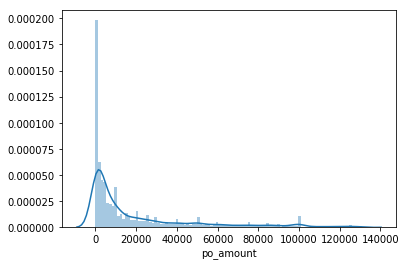

In [23]:
#Probability density function
sns.distplot(sales['po_amount'],bins=100)

(array([3299., 1040.,  757.,  721.,  381.,  371.,  336.,  643.,  176.,
         206.,  136.,  226.,  164.,  122.,  121.,  268.,  102.,  101.,
         104.,  201.,   90.,   73.,  161.,   68.,   57.,   61.,   92.,
          56.,   59.,   56.,  127.,   63.,   55.,   40.,   63.,   46.,
          59.,   51.,  165.,   49.,   44.,   51.,   41.,   30.,   38.,
          89.,   37.,   41.,   32.,   36.,   36.,   22.,   32.,   41.,
          36.,   17.,   18.,   86.,   19.,   24.,   39.,   19.,   31.,
          25.,   73.,   20.,   32.,   21.,   49.,    9.,   23.,   20.,
          34.,   15.,   30.,   30.,  178.,   13.,   12.,   14.,   11.,
          10.,   10.,   17.,   10.,   10.,   13.,   15.,   11.,    9.,
          11.,   19.,   10.,   16.,   12.,   31.,    9.,   12.,   13.,
          21.]),
 array([1.00000000e-02, 1.31258410e+03, 2.62515820e+03, 3.93773230e+03,
        5.25030640e+03, 6.56288050e+03, 7.87545460e+03, 9.18802870e+03,
        1.05006028e+04, 1.18131769e+04, 1.31257510e+04, 1.

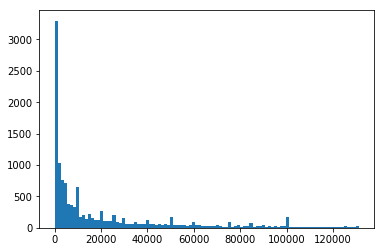

In [24]:
num_bins=100
plt.hist(sales['po_amount'],num_bins)

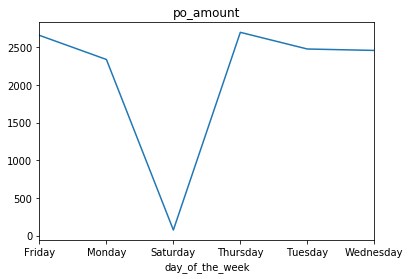

In [25]:
#Distribution of Categorical Variables
make_dist.plot(title='po_amount')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135E9B21550>]],
      dtype=object)

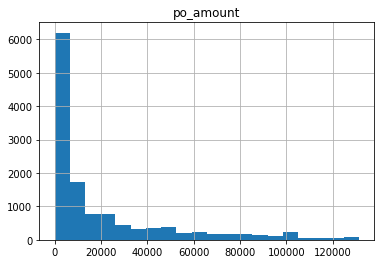

In [26]:
sales.hist(bins=20)

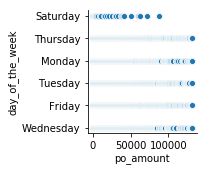

In [27]:
#Pairplot to find the relationship between Purchase Order Amount and the Day of the week for relation]

sns.pairplot(x_vars=['po_amount'],y_vars=['day_of_the_week'],data=sales)

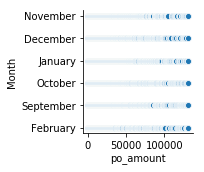

In [28]:
#Pairplot to find the relationship between Purchase Order Amount and the Month for relation]

sns.pairplot(x_vars=['po_amount'],y_vars=['Month'],data=sales)

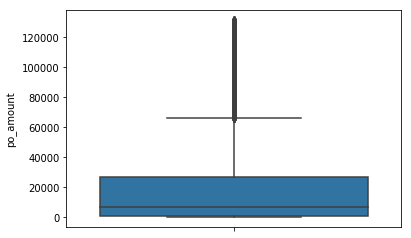

In [29]:
#Box-plot between the Purchase Order amount to find outliers. This is from an overall perspective.

box1=sns.boxplot(y='po_amount',data=sales)

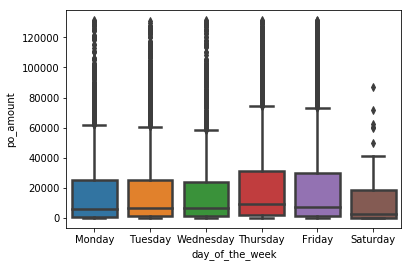

In [30]:
#Box-plot between the Purchase Order amount to find outliers. This is from a daily perspective.

ax = sns.boxplot(x="day_of_the_week", y="po_amount",data=sales, linewidth=2.5,order=["Monday", "Tuesday","Wednesday", "Thursday","Friday", "Saturday"])

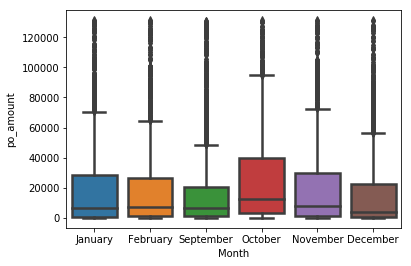

In [34]:
#Box-plot between the Purchase Order amount to find outliers. This is from a monthly perspective.

ax = sns.boxplot(x="Month", y="po_amount",data=sales, linewidth=2.5,order=["January", "February","September", "October","November", "December"])

## Kurtosis and Skewness

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

Kurtosis describes how sharp the tip of the graph is

In [32]:
# skewness along the index axis 
print("The Skew is ")
sales.skew(axis = 0, skipna = False) 

The Skew is 


po_amount    1.805603
dtype: float64

Since the skewness of the plot w.r.t. po_amount is positive, the mean and the median will be greater than the mode.

This also means that the distribution of po_amount is skewed towards the right.

In [33]:
# Calculating the kurtosis
x1 = sales['po_amount'] 
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  ) 
print("The Kurtosis is ")
kurtosis(x1)

The Kurtosis is 


2.509962996085023

Since the kurtosis is less than zero,the distribution is light tails and is called a platykurtic distribution. This signifies the presence of extremely sharp areas in the curve.